In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [268]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        #if X.shape[1] == 1:
        #    print("X.shape[1]", X.shape[1])
        #    self.weights = np.zeros(X.shape[1] + 1)
        #else:
        print("X.shape", X.shape)
        #X = X.reshape(X.shape[0], 1)
        m, n = X.shape
        one = np.ones((X.shape[0], 1))
        X = np.hstack((one, X))
        y = y.reshape(y.shape[0], 1)
        self.weights = np.zeros((n + 1, 1))
        
        print("self.weights", self.weights)
        print("self.weights.shape", self.weights.shape)
        print("X.shape after", X.shape)
        print("y.shape after", y.shape)
        for epoch in range(epochs):
            for batch in range(len(X)//batch_size):
                
                X_batch = X[batch * batch_size: (batch + 1) * batch_size]
                y_batch = y[batch * batch_size: (batch + 1) * batch_size]
                
                m = y_batch.size
                y_pred = np.dot(X, self.weights)
                error = y_pred - y_batch
                
                t = np.dot(X_batch.T, error)
                #print("t", t)
                
                self.weights -= lr * (1/m) * t
                
                '''
                y_pred = self.predict(X_batch)
                #print("X_batch", X_batch)
                #print("y_pred", y_pred)
                #print("y_batch", y_batch)
                error = y_pred - y_batch
                
                D_weight = 2 * np.mean(X_batch * error)
                D_Intercept = 2 * np.mean(error)
                
                self.weights[:-1] -= lr * D_weight
                self.weights[-1] -= lr * D_Intercept
                '''
                
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))

    def get_loss(self, X, y):
        m = y.size
        y_pred = np.dot(X, self.weights)
        error = y_pred - y
        #return 1/(2*m) * np.dot(error.T, error)
        return (1/2) * np.mean(error ** 2)
        '''
        y_pred = self.predict(X)
        error = y_pred - y
        return np.mean(error ** 2)
        '''

    def predict(self, X):
        m, n = X.shape
        one = np.ones((X.shape[0], 1))
        X = np.hstack((one, X))
        self.weights = np.zeros((n + 1, 1))
        
        return np.dot(X, self.weights)
        #return self.weights[-1] + self.weights[:-1] * X
                
    def evaluate(self, X, y):
        m, n = X.shape
        one = np.ones((X.shape[0], 1))
        X = np.hstack((one, X))
        y = y.reshape(y.shape[0], 1)
        self.weights = np.zeros((n + 1, 1))
        
        #m = y.size
        y_pred = np.dot(X, self.weights)
        error = y_pred - y
        #return 1/(2*m) * np.dot(error.T, error)
        return (1/2) * np.mean(error ** 2)
        '''
        y_pred = self.predict(X)
        error = y_pred - y
        return np.mean(error ** 2)
        '''
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss, label='Training Loss')
        plt.title('Training Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Load data & data pre-processing

In [269]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [270]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [271]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [272]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [273]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################


# You may try different label encoding for training your own model


sex_map = {'female': 0, 'male': 1}
smoker_map = {'no': 0, 'yes': 1}
region_map = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


#df_train['sex_encoded'] = df_train['sex'].map(sex_map)
#df_train['smoker_encoded'] = df_train['smoker'].map(smoker_map)

df_train['sex'] = df_train['sex'].map(sex_map)
df_train['smoker'] = df_train['smoker'].map(smoker_map)
df_train['region'] = df_train['region'].map(region_map)

df_val['sex'] = df_val['sex'].map(sex_map)
df_val['smoker'] = df_val['smoker'].map(smoker_map)
df_val['region'] = df_val['region'].map(region_map)

df_test['sex'] = df_test['sex'].map(sex_map)
df_test['smoker'] = df_test['smoker'].map(smoker_map)
df_test['region'] = df_test['region'].map(region_map)

# Print the DataFrame
print(df_train)

     age  sex     bmi  children  smoker  region      charges
0     19    0  27.900         0       1       3  16884.92400
1     18    1  33.770         1       0       2   1725.55230
2     28    1  33.000         3       0       2   4449.46200
3     33    1  22.705         0       0       1  21984.47061
4     32    1  28.880         0       0       1   3866.85520
..   ...  ...     ...       ...     ...     ...          ...
933   45    0  35.300         0       0       3   7348.14200
934   32    1  37.180         2       0       2   4673.39220
935   59    0  27.500         0       0       3  12233.82800
936   44    1  29.735         2       0       0  32108.66282
937   39    0  24.225         5       0       1   8965.79575

[938 rows x 7 columns]


# Single feature (using bmi)

In [274]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [275]:
# TODO
# You may convert data to NumPy here 

x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
#print("x_train", x_train)
print("X.ndim", x_train.ndim)
print("X.shape", x_train.shape)
print("np.ones((m, 1)):", (np.ones((x_train.shape[0], 1))).shape)

X = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
print("X", X)

X.ndim 2
X.shape (938, 1)
np.ones((m, 1)): (938, 1)
X [[ 1.    27.9  ]
 [ 1.    33.77 ]
 [ 1.    33.   ]
 ...
 [ 1.    27.5  ]
 [ 1.    29.735]
 [ 1.    24.225]]


In [276]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
#lr = 0.001
#epochs = 5000
lr = 0.01
epochs = 100

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.
X.shape (938, 1)
self.weights [[0.]
 [0.]]
self.weights.shape (2, 1)
X.shape after (938, 2)
y.shape after (938, 1)


In [277]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])
#Intercepts:  1382.5371644361621
#Weights:  [380.13464539]])

Intercepts:  [-4.62031357e+97]
Weights:  [[-1.4406632e+96]]


In [278]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  158583692.73025915


In [279]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  171984375.99382156


In [280]:
test_pred = linear_reg.predict(x_test)
#print("test_pred", test_pred)

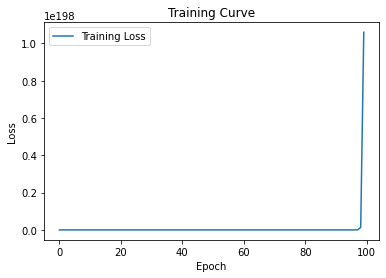

In [281]:
linear_reg.plot_curve()

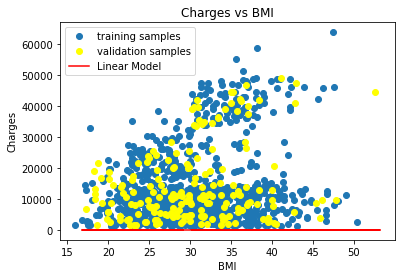

In [282]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO

plt.plot(x_train, y_train, 'o', label='training samples')
plt.plot(x_val, y_val, 'o', label='validation samples', color='yellow')
plt.plot(x_test, test_pred, label='Linear Model', color='red')
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

#linear_reg.weights = [380.13464539, 1382.5371644361621]
#print('target training loss: ', linear_reg.evaluate(x_train, y_train))
#print('target validation loss: ', linear_reg.evaluate(x_val, y_val))

# Multiple features

In [283]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [284]:
# TODO
# You may convert data to NumPy here 

x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
#y_test_np = np.array(y_test)

#print('x_train_np:', x_train_np)
#print('y_train_np:', y_train_np)
print("X.ndim", x_train.ndim)
print("X.shape[1]", x_train.shape[1])

X.ndim 2
X.shape[1] 6


In [285]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.0001
epochs = 1000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.
X.shape (938, 6)
self.weights [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
self.weights.shape (7, 1)
X.shape after (938, 7)
y.shape after (938, 1)


In [286]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])
#Intercepts:  -11857.057377634748
#Weights:  [  259.8508643   -383.54524271   333.33251548   442.55747876
# 24032.22099619  -416.0143858 ]

Intercepts:  [-68.69911052]
Weights:  [[-16.75752734]
 [225.51918894]
 [ 14.5172344 ]
 [141.94339237]
 [ 33.68083174]
 [371.80361537]]


In [287]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  158583692.73025915


In [288]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  171984375.99382156


In [289]:
test_pred = linear_reg.predict(x_test)

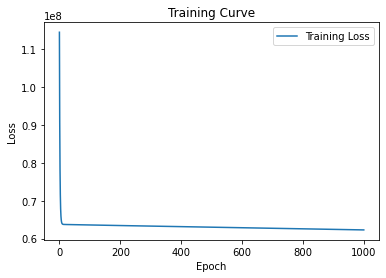

In [290]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [291]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [292]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")